In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
import math

# Importing and Analysis of Dataset

In [37]:
data = pd.read_csv("./framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [38]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [39]:
print(f"DATASET SIZE: {data.shape}")

DATASET SIZE: (4238, 16)


In [40]:
data.isnull().sum() # to get no. of null values or say missing values in the dataset

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Removing missing values

In [41]:
print(data["education"].median())
print(data["cigsPerDay"].mode()[0])
print(data["BPMeds"].mode()[0])
print(data["totChol"].mode()[0])
print(data["BMI"].mean())
print(data["heartRate"].mode()[0])
print(data["glucose"].mode()[0])

2.0
0.0
0.0
240.0
25.80200758473572
75.0
75.0


In [42]:
data["education"] = data["education"].fillna(data["education"].median())
data["cigsPerDay"] = data["cigsPerDay"].fillna(data["cigsPerDay"].mode()[0])
data["BPMeds"] = data["BPMeds"].fillna(data["BPMeds"].mode()[0])
data["totChol"] = data["totChol"].fillna(data["totChol"].mode()[0])
data["BMI"] = data["BMI"].fillna(data["BMI"].mean())
data["heartRate"] = data["heartRate"].fillna(data["heartRate"].mode()[0])
data["glucose"] = data["glucose"].fillna(data["glucose"].mode()[0])
data.isnull().sum() # to get no. of null values or say missing values in the dataset

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Visualizing the Dataset

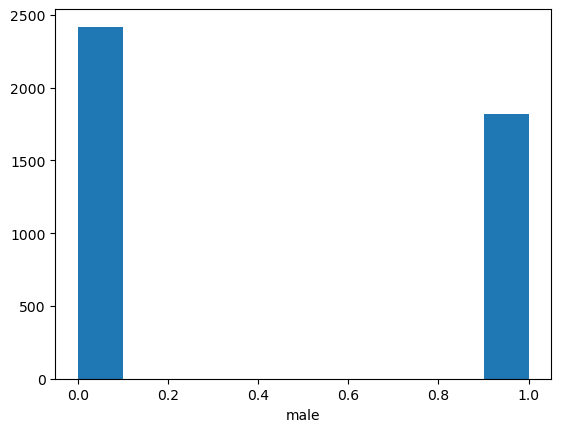

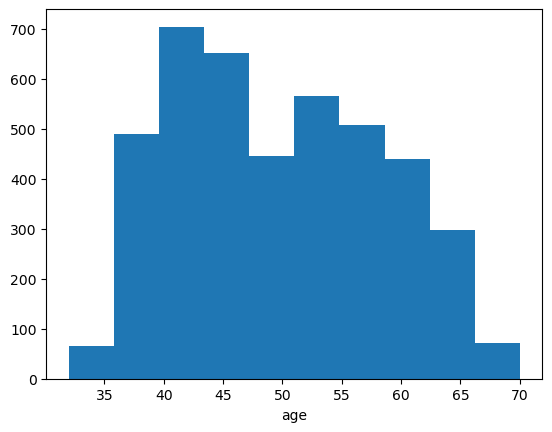

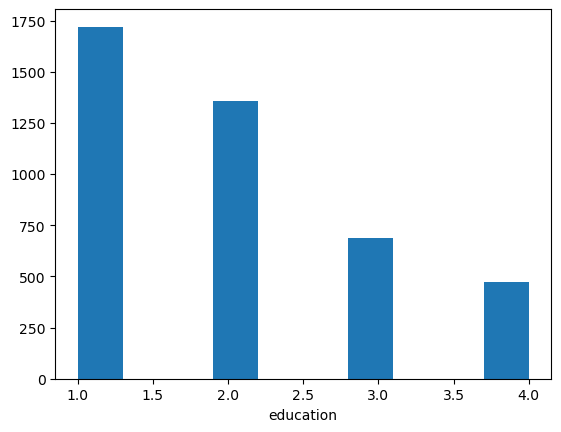

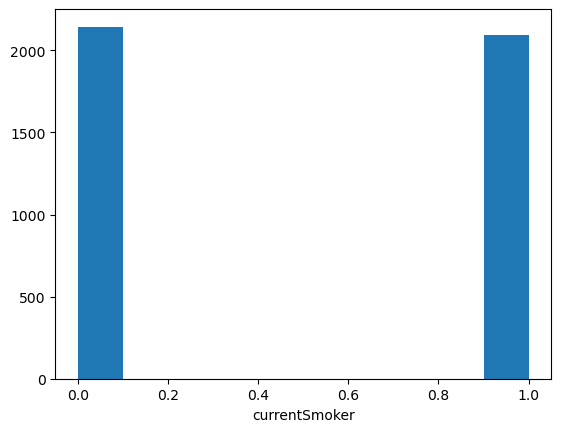

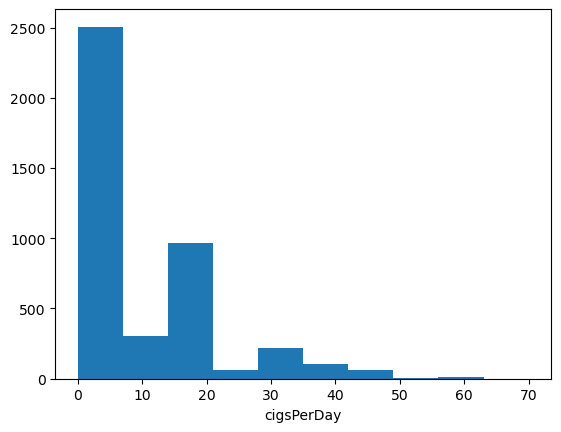

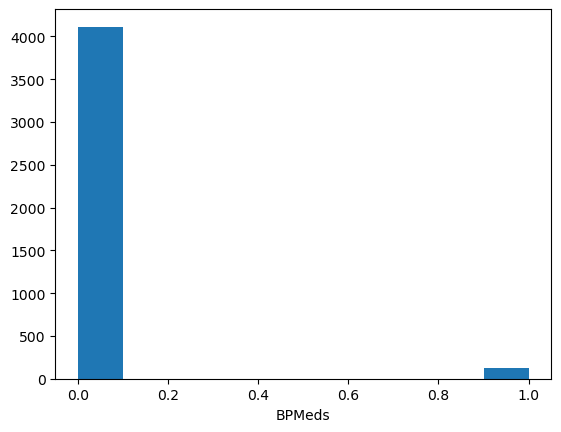

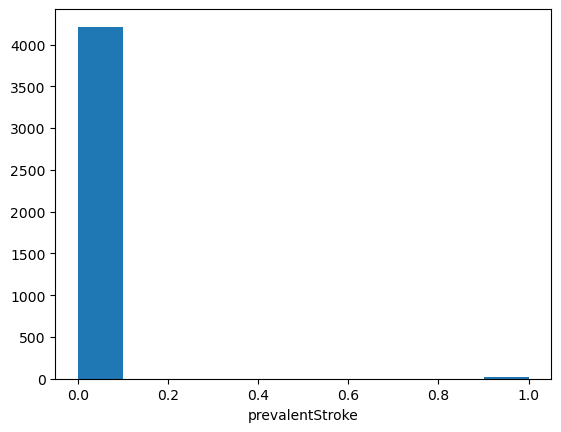

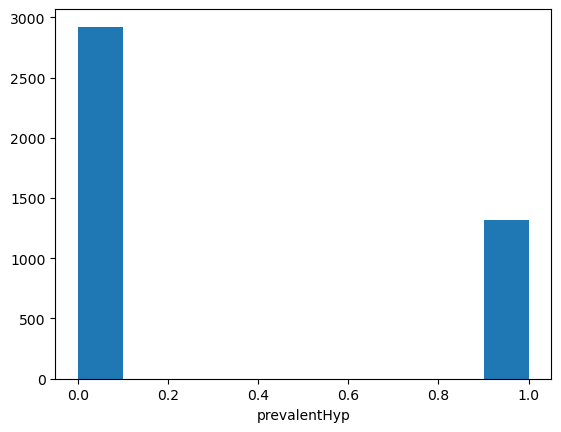

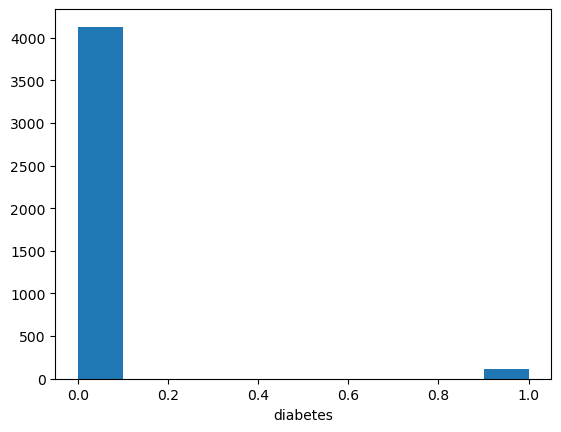

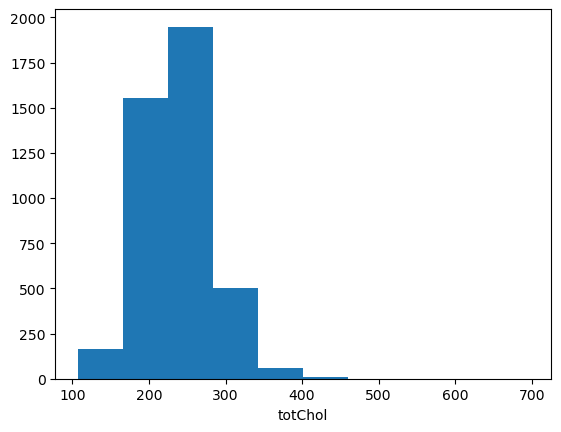

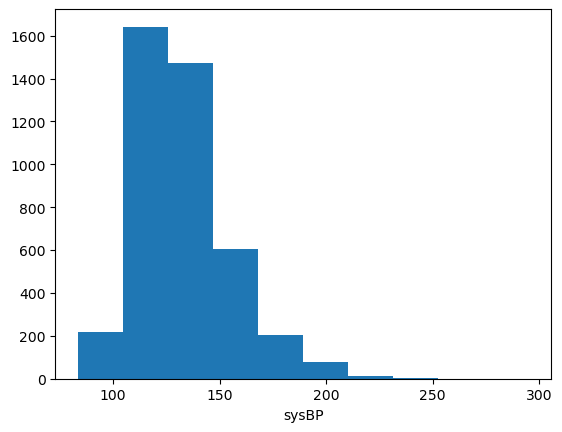

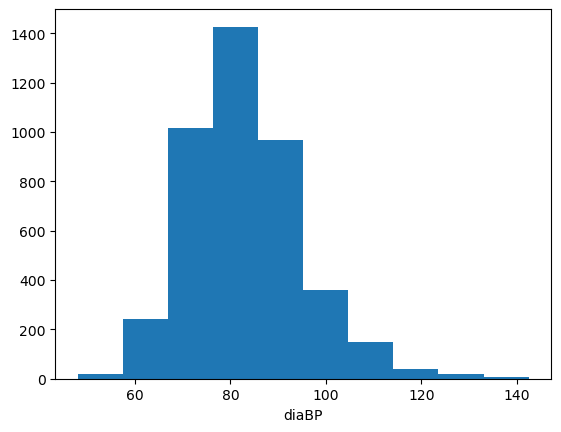

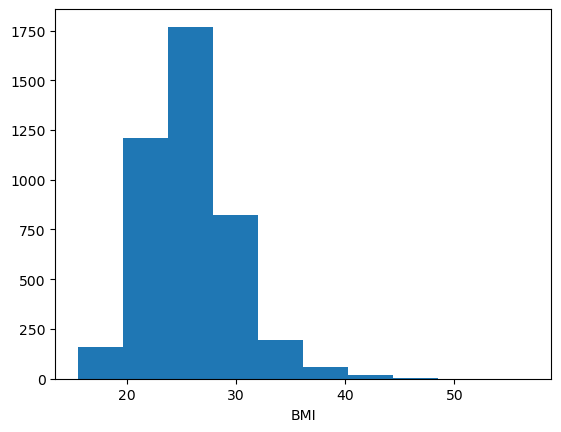

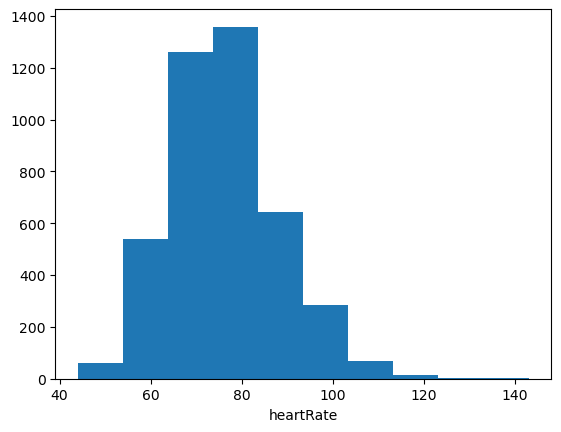

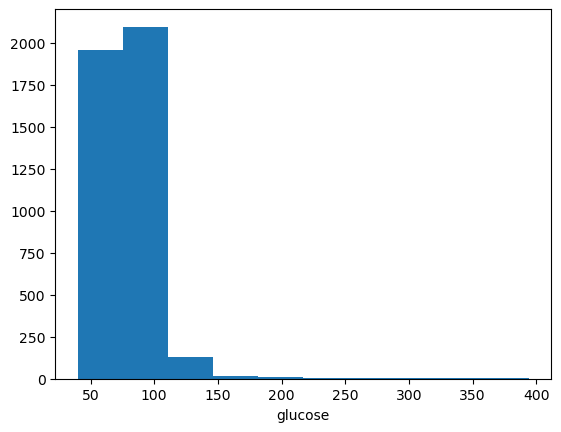

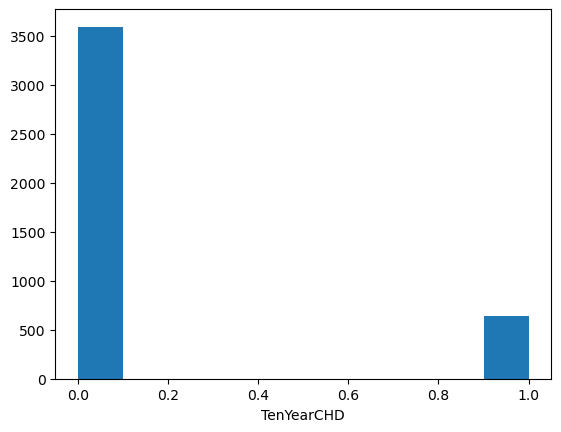

In [43]:
cols = data.columns
for col in cols:
    plt.xlabel(col)
    plt.hist(data[col])
    plt.show()

# Feature Selection using Correlation Matrix

<Axes: >

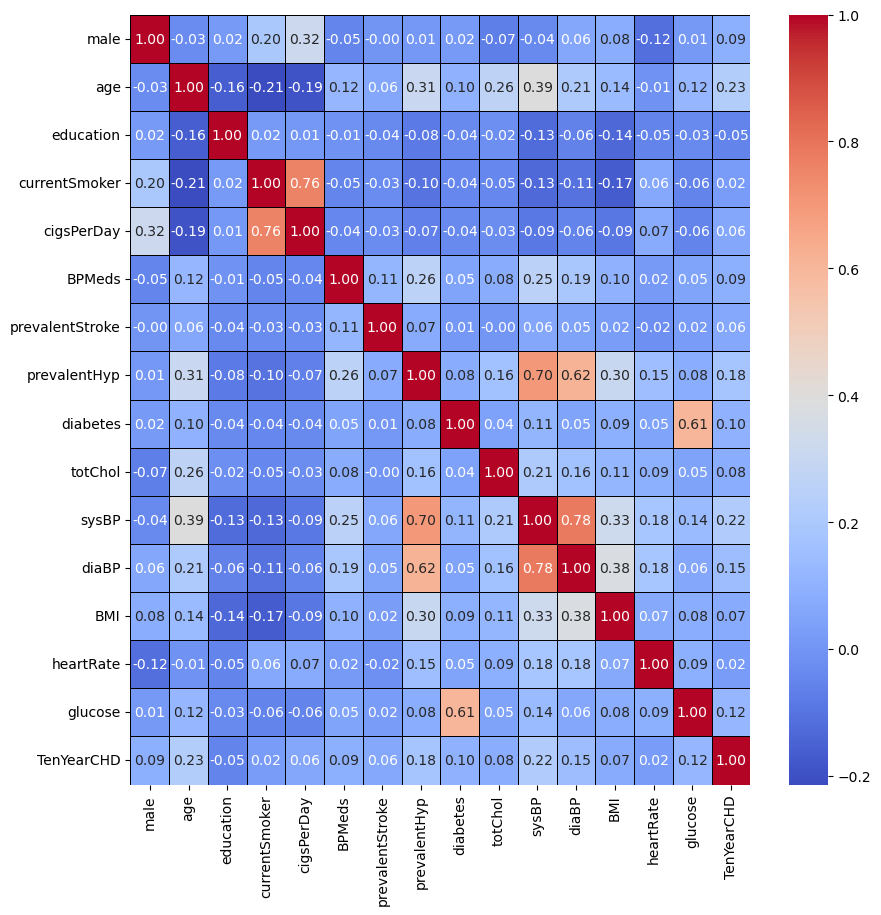

In [44]:
# Now we need to peform feature or variable selection
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, fmt="0.2f", linewidths=0.5, linecolor="Black")

In [45]:
dependent_X = data[["male", "age", "currentSmoker", "cigsPerDay", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]]
independent_Y = data["TenYearCHD"]

# Train and Test Data Split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(dependent_X, independent_Y, random_state=42, train_size=0.8, shuffle=True)

In [47]:
print(f"DATASET: {data.shape}")
print(f"X_TRAIN: {x_train.shape}")
print(f"X_TEST: {x_test.shape}")
print(f"Y_TRAIN: {y_train.shape}")
print(f"Y_TEST: {y_test.shape}")

DATASET: (4238, 16)
X_TRAIN: (3390, 14)
X_TEST: (848, 14)
Y_TRAIN: (3390,)
Y_TEST: (848,)


# Generating Model using `sklearn`'s LogisticRegression

In [48]:
model = LogisticRegression()

In [49]:
model.fit(x_train, y_train)

/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
print(f"The coefficients of the sigmoid function were: {model.coef_}")

The coefficients of the sigmoid function were: [[ 0.37008072  0.03159291 -0.32631374  0.02526371  0.18606154  0.07061384
   0.98943433  0.16418035 -0.00243272  0.01178743 -0.02228464 -0.05644495
  -0.02153308  0.00508072]]


In [51]:
y_predicted = model.predict(x_test)
y_predicted_prob = model.predict_proba(x_test)

In [52]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_predicted)
mse = mean_absolute_error(y_true=y_test, y_pred=y_predicted)
rmse = math.sqrt(mse)

print(f"Accuracy Score of Model: {accuracy}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Accuracy Score of Model: 0.8549528301886793
Mean Squared Error: 0.14504716981132076
Root Mean Squared Error: 0.38085058725348025
